## Libraries used

In [102]:
from selenium import webdriver
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

## Scraping data from website of year 2019 

As the website is dynamic and contains javascript code, we would use Selenium with beautiful soup to scrap the tables from the website

In [14]:
## Setting driver path for chrome
driver = webdriver.Chrome('C:/Users/chand/Downloads/chromedriver_win32/chromedriver')

In [15]:
driver.get("https://doris.delhigovt.nic.in/DeedWiseDocCount.aspx")

In [16]:
search = driver.find_element_by_id("ctl00_ContentPlaceHolder1_ddl_sro")
search.send_keys("New Delhi- Sarojini Nagar (SR VII A)")

In [17]:
search = driver.find_element_by_id("ctl00_ContentPlaceHolder1_RadioButtonList1_1").click()

In [18]:
search = driver.find_element_by_id("ctl00_ContentPlaceHolder1_ddl_year")
search.send_keys("2019")

In [19]:
search = driver.find_element_by_id("ctl00_ContentPlaceHolder1_btnproceed").click()

In [20]:
soup = BeautifulSoup(driver.page_source)

In [21]:
soup

<html xmlns="http://www.w3.org/1999/xhtml"><head><meta content="tSo9JGIQr9iqQylj9CXHPGW4wX1Xd1nT2bh3WGRFLLc" name="google-site-verification"/><title>
	Deed Wise Count
</title><link href="Styles/StyleSheet.css" rel="stylesheet" type="text/css"/><link href="Styles/header.css" rel="stylesheet" type="text/css"/><link href="Images/Letter-D-blue-icon.png" rel="icon" type="image/xx-icon"/></head>
<body style="background-image: url('Images/tri.JPG');">
<script type="text/javascript">
        function mousedown() {
            return false;
        }
        function mouseup(e) {
            if (e != null && e.type == "mouseup") {
                if (e.which == 2 || e.which == 3) {
                    return false;
                }
            }
        }
        function contextMenu() {
            return false;
        }

        if (document.layers) {
            document.captureEvents(Event.MOUSEDOWN);
            document.onmousedown = mousedown;
        }
        else {
            docum

In [22]:
table = soup.find('table', attrs={'id':'ctl00_ContentPlaceHolder1_GridView1'})

In [24]:
table_rows = table.find_all('tr')

In [60]:
driver.close()

## Creating dataframe from above table rows

In [49]:
col_names = []
for tr in table_rows:
    th = tr.find_all('th')
    row = [tr.text for tr in th]
    col_names.append(row)
col_names = col_names[0]
print(col_names)

['Instrument Type', 'Document Recieved', 'Document Registered', 'Document Delivered', 'Pending(Not Delivered) Docs', 'Pending (Not-Registered) Docs', 'Impound Docs']


In [51]:
data_2019 = []
for tr in table_rows:
    td = tr.find_all('td')
    
    row = [tr.text for tr in td]
    data_2019.append(row)
df = pd.DataFrame(data_2019,columns=col_names)
print(df)

In [56]:
# Removing row containing None
df = df[1:]

In [57]:
df

,Instrument Type,Document Recieved,Document Registered,Document Delivered,Pending(Not Delivered) Docs,Pending (Not-Registered) Docs,Impound Docs
1,ADOPTION,5,5,5,0,0,0
2,AGREEMENT,81,81,78,3,0,0
3,ASSIGNMENT OF DEBTS,1,1,1,0,0,0
4,CANCELLATION OF INSTRUMENT,20,20,20,0,0,0
5,CERTIFICATE OF SALE,6,6,6,0,0,0
6,CONVEYANCE,18,18,18,0,0,0
7,DECLARATION,31,30,30,0,1,0
8,DECREE,2,1,0,1,1,0
9,DISCLAIMER,2,2,2,0,0,0
10,DISOLUTION DEED,1,1,1,0,0,0


In [89]:
## Changing datatypes
df[col_names[1:]] = df[col_names[1:]].apply(pd.to_numeric)

C:\Users\chand\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [90]:
df.dtypes

Instrument Type                  object
Document Recieved                 int64
Document Registered               int64
Document Delivered                int64
Pending(Not Delivered) Docs       int64
Pending (Not-Registered) Docs     int64
Impound Docs                      int64
dtype: object

In [97]:
## Fixing messy column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
print(df.columns)

Index(['instrument_type', 'document_recieved', 'document_registered',
       'document_delivered', 'pendingnot_delivered_docs',
       'pending_not-registered_docs', 'impound_docs'],
      dtype='object')


## Data Exploration

In [96]:
## Descriptive Summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
document_recieved,30.0,255.466667,733.866883,1.0,4.25,21.0,87.00,3832.0
document_registered,30.0,252.933333,726.888785,1.0,3.50,21.0,84.00,3794.0
document_delivered,30.0,246.200000,707.330016,0.0,3.50,21.0,82.50,3693.0
pendingnot_delivered_docs,30.0,6.733333,19.805839,0.0,0.00,0.0,1.75,101.0
pending_not-registered_docs,30.0,2.533333,7.113529,0.0,0.00,0.0,1.00,38.0
impound_docs,30.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


In [119]:
## Reoving impound_docs as all the values are zeroes
df = df.drop(["impound_docs"],axis=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

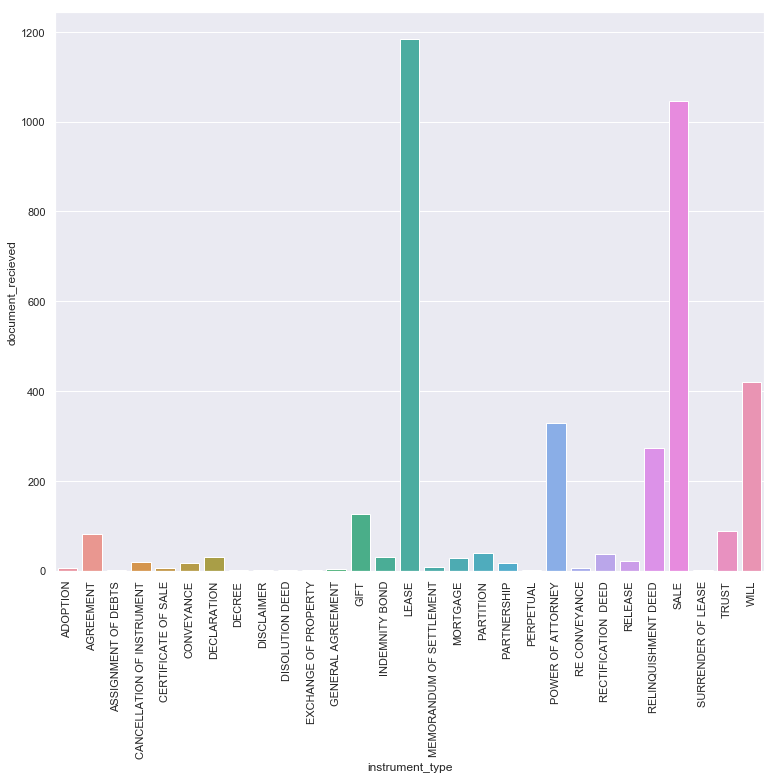

In [120]:
#Barplot of document received per instrument_type ignoring total
sns.set(rc={'figure.figsize':(12.7,10.27)})
sns.barplot(x ='instrument_type' , y = 'document_recieved',data = df[0:-1])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

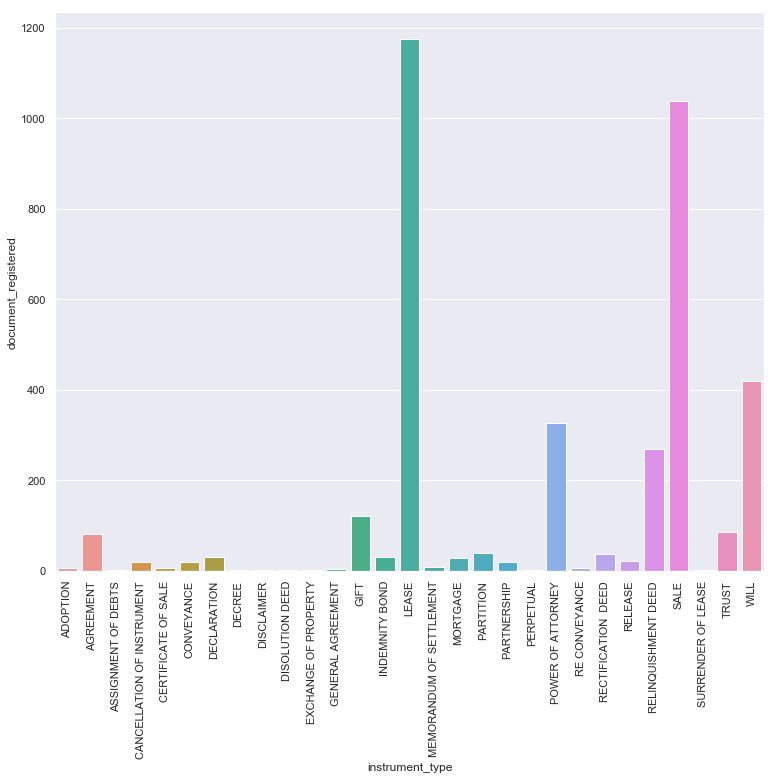

In [121]:
#Barplot of document registered per instrument_type ignoring total
sns.set(rc={'figure.figsize':(12.7,10.27)})
sns.barplot(x ='instrument_type' , y = 'document_registered',data = df[0:-1])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

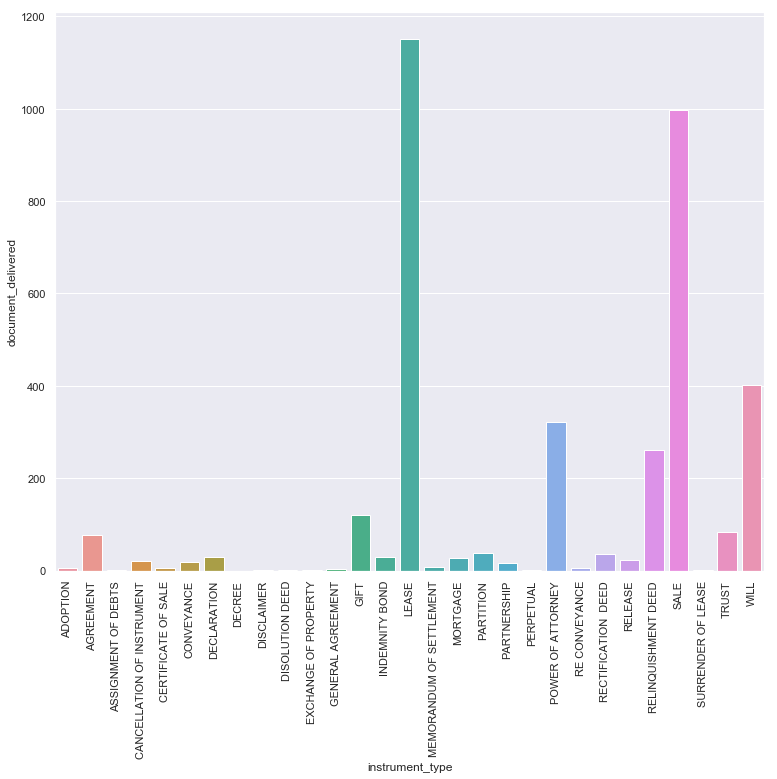

In [122]:
#Barplot of document delivered per instrument_type ignoring total
sns.set(rc={'figure.figsize':(12.7,10.27)})
sns.barplot(x ='instrument_type' , y = 'document_delivered',data = df[0:-1])
plt.xticks(rotation=90)

It seems that barplot of all the three variables are nearly same, let us check correlation among them

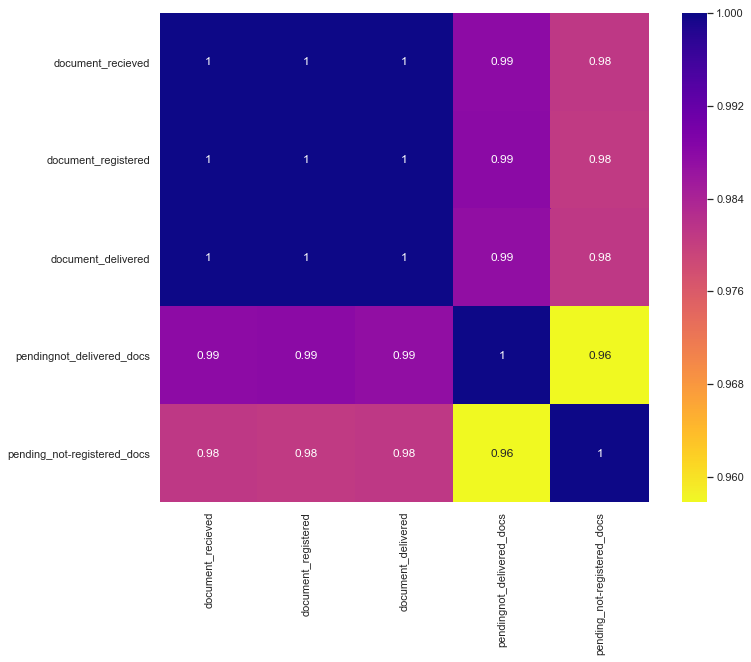

In [123]:
## Correlation Matrix
corrmat=df.corr()
colormap=plt.cm.plasma_r
f, ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,square=True,cmap=colormap,annot=True)

All Variables are highly correlated nearly equals to one.

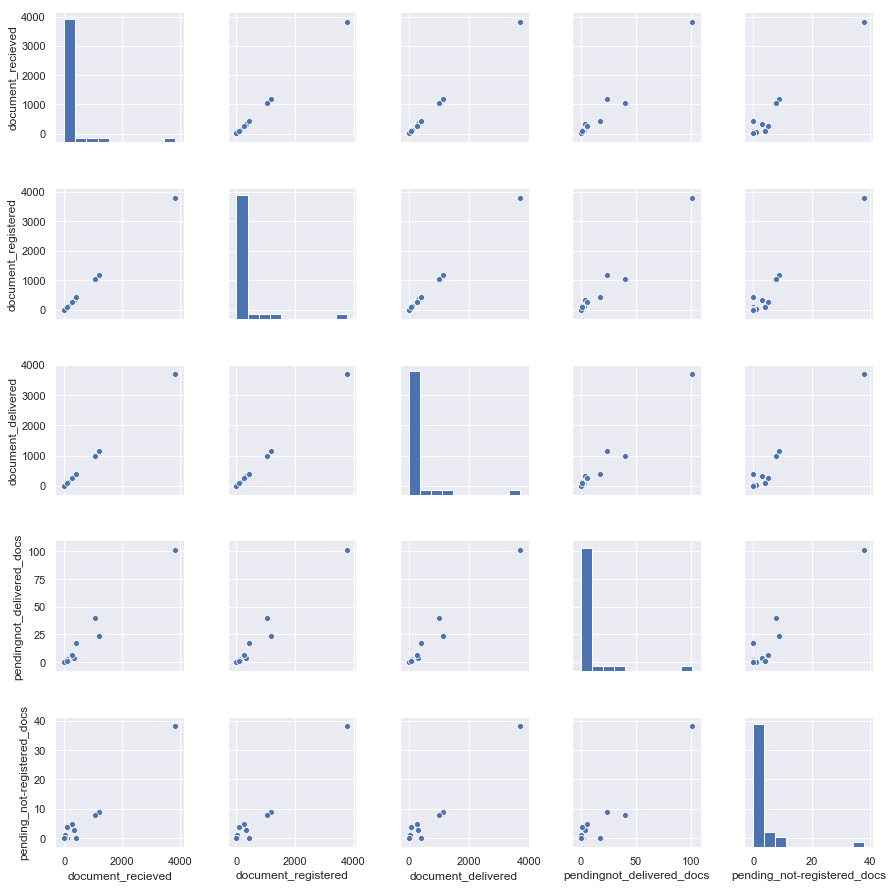

In [127]:
## Creating scatterplot of all numeric variables
sns.pairplot(df)

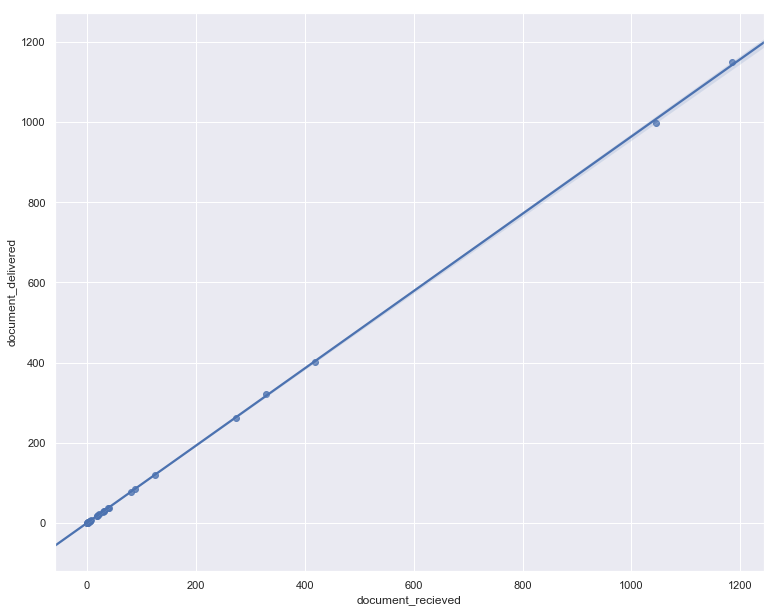

In [128]:
## Fitting a regression plot
sns.regplot(x="document_recieved", y="document_delivered", data=df[0:-1]);

## Issue faced in this assignment

The main issue I faced was of scraping the data from dynamic web page as normal get method with beautiful soup doesn't work,
so I used selenium.


Second issue I faced with the data size as it is very small to make more effective insights out of it.

## Conclusion

It was a fun assignment, I learned some good stuff about web scraping from it.